In [4]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.collections as mc
import numpy as np
import random as rand

### simple random walk

/Users/varun/miniconda2/envs/VRDI/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/Users/varun/miniconda2/envs/VRDI/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:585: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  and cb.iterable(edge_color) \
/Users/varun/miniconda2/envs/VRDI/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:595: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  for c in edge_color]):


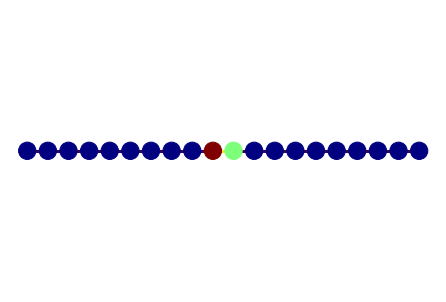

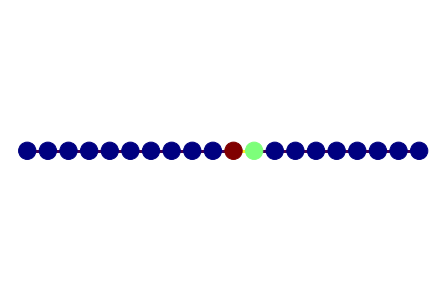

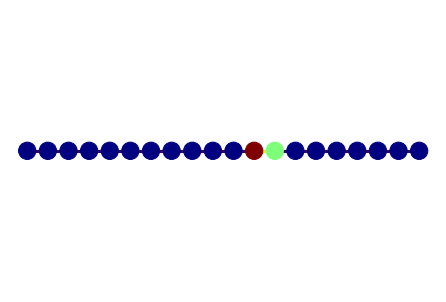

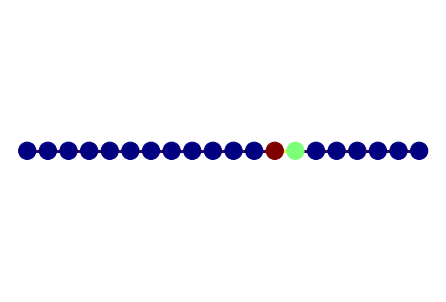

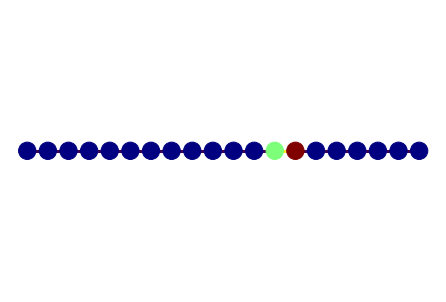

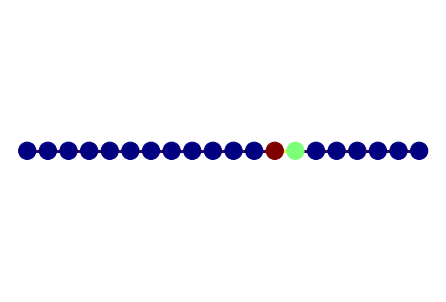

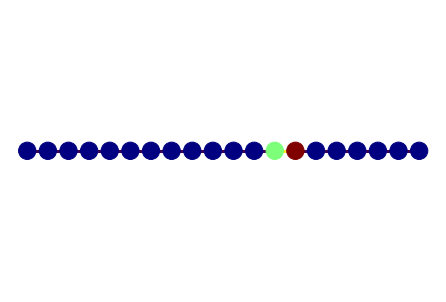

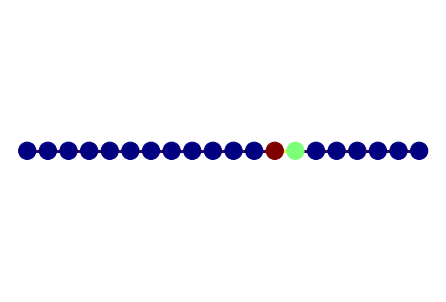

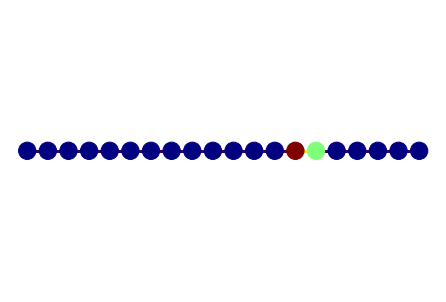

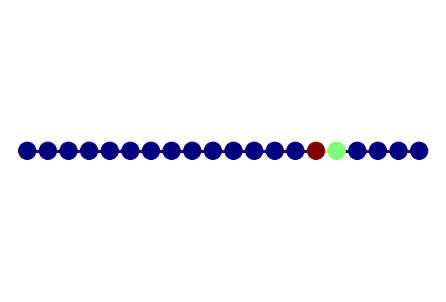

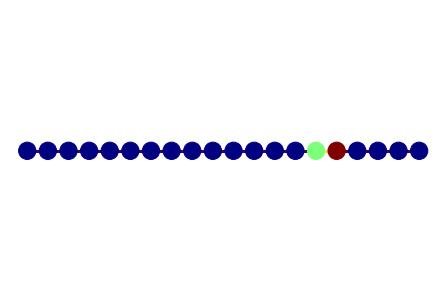

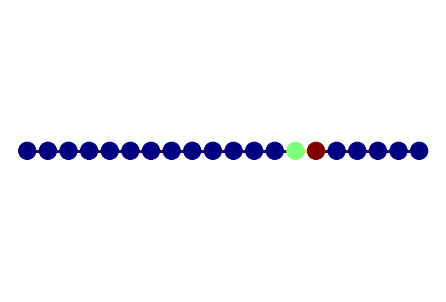

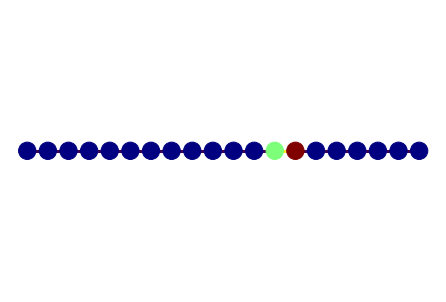

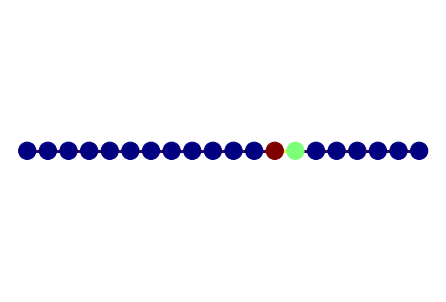

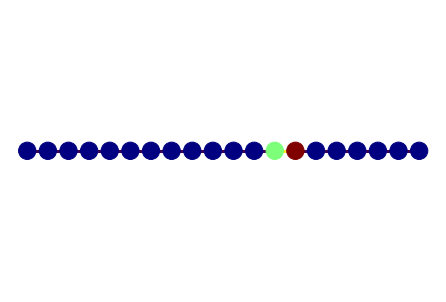

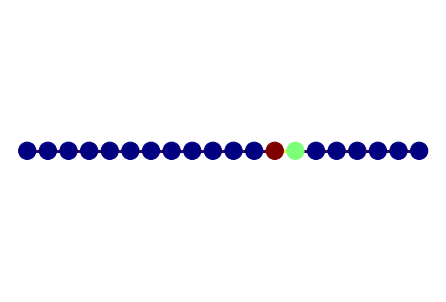

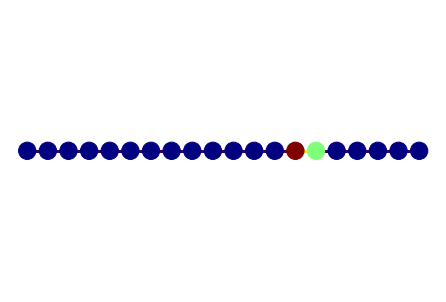

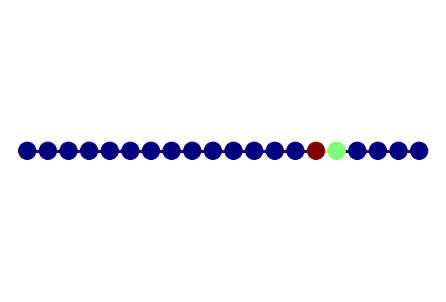

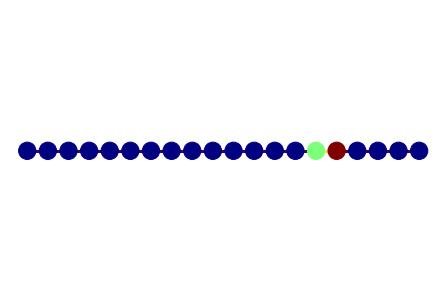

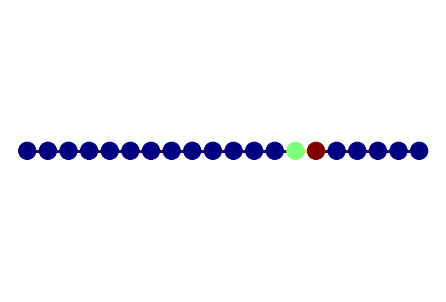

In [4]:
g = nx.grid_graph([1,20])

state = rand.choice(list(g.nodes()))
state = (9, 0)
steps = 20

for i in range(steps):
    node_colors = {x:0 for x in g.nodes}
    edge_colors = {x:0 for x in g.edges}
    old_state = state
    
    state = rand.choice(list(g.neighbors(state)))
    edge_colors[(old_state, state)]= 1
    edge_colors[(state, old_state)]= 1
    node_colors[old_state] = 2
    node_colors[state]=1
    plt.figure()
    nx.draw(g,pos = {x:x for x in g.nodes()}, node_color = [node_colors[x] for x in g.nodes()],edge_color = [edge_colors[x] for x in g.edges()],
        width =3, cmap="jet")
    plt.show()


### random walk on a line

Text(0.5, 1.0, 'Random walks')

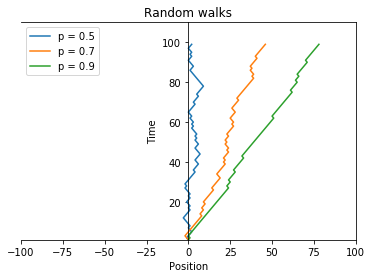

In [147]:
# initial position
current = 0

total_length = 100

walk_probabilities = [.5, .7, .9]

# random walk
for k in walk_probabilities:

    random_walk = []
    current = 0

    for j in range(total_length):
        alpha = rand.random()
        if (alpha < k):
            current += 1 
        else:
            current -= 1
            
        random_walk.append((current, j))

    x, y = zip(*random_walk)
    plt.plot(x, y, label='p = {0}'.format(k))

ax = plt.gca()
ax.spines['left'].set_position(('data',0))
plt.xlim([-total_length, total_length])
plt.ylim([1, total_length * 1.1])
plt.legend(loc='upper left')
plt.xlabel("Position")
plt.ylabel("Time")
plt.title("Random walks")

### short bursts

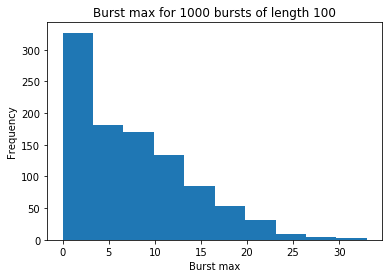

In [122]:
"""Show distribution of Z_m, the burst maxes/record highs for each burst."""


# PARAMS
m = 100
num_bursts = 1000
total_length = m * num_bursts


# initial position
current = 0

random_walk = []
burst_maxes = []

for j in range(num_bursts):

    burst = []
    current = 0
    burst_max = 0

    for i in range(m):
        alpha = rand.random()
        if (alpha > .5):
            current += 1
        else:
            current -= 1

        burst.append(current)
        burst_max = max(burst_max, current)

    burst_maxes.append(burst_max)

plt.hist(burst_maxes)
plt.xlabel("Burst max")
plt.ylabel("Frequency")
plt.title("Burst max for {0} bursts of length {1}".format(num_bursts, m))
#plt.savefig("Output/burst_max_dist.png")
plt.show()

In [62]:
"""Visualize short burst run."""


# PARAMS
m = 10
num_bursts = 10
total_length = m * num_bursts
# probability of moving right
burst_probabilities = [.5]


# initial position
current = 0

for k in burst_probabilities:
    t = 0
    
    burst_max = 0 # position, time
    burst_maxes = []
    random_walk = []
    
    for j in range(num_bursts):

        burst = [(burst_max, t)]
        current = burst_max
        max_time = 0 
        
        for i in range(m):
            alpha = rand.random()
            if (alpha < k):
                current += 1
            else:
                current -= 1

            random_walk.append((current, t))
            burst.append((current, t))
            
            if (current > burst_max):
                burst_max = max(burst_max, current)
                max_time = t
            t+=1

    x, y = zip(*random_walk)
    #plt.plot(x, y, label='p = {0}'.format(k))
    #dt=np.dtype('int, ')
    lis = [list(elem) for elem in burst]
    print(lis)
    lc = mc.LineCollection(lis, linewidths=2)
    #fig, ax = pl.subplots()
    ax.add_collection(lc)
    
ax = plt.gca()
ax.spines['left'].set_position(('data',0))
plt.xlim([-total_length, total_length])
plt.ylim([0, total_length * 1.1])
plt.legend(loc='upper left')
plt.xlabel("Position")
plt.ylabel("Time")
plt.title("Short bursts")
plt.show()

[[13, 90], [12, 90], [13, 91], [14, 92], [13, 93], [14, 94], [15, 95], [14, 96], [15, 97], [16, 98], [17, 99]]


ValueError: 'vertices' must be a 2D list or array with shape Nx2

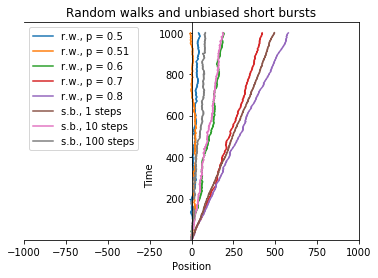

In [20]:
"""Compare random walks to short bursts on a line."""


# PARAMS
m = [1, 10, 100]
num_bursts = [1000, 100, 10]
#total_length = m * num_bursts
total_length = 1000
# proability of moving right
walk_probabilities = [.5, .51, .6, .7, .8]
# probability of moving right
burst_probabilities = [.5]


# initial position
current = 0

# simple random walk
for k in walk_probabilities:

    random_walk = []
    current = 0

    for j in range(total_length):
        alpha = rand.random()
        if (alpha < k):
            current += 1 
        else:
            current -= 1
            
        random_walk.append((current, j))

    x, y = zip(*random_walk)
    plt.plot(x, y, label='r.w., p = {0}'.format(k))

# short burst

for r in range(len(num_bursts)):
    for k in burst_probabilities:
        t = 0

        burst_max = 0
        burst_maxes = []
        random_walk = []

        for j in range(num_bursts[r]):

            burst = []
            current = burst_max 

            for i in range(m[r]):
                t+=1
                alpha = rand.random()
                if (alpha < k):
                    current += 1
                else:
                    current -= 1

                random_walk.append((current, t))
                burst_max = max(burst_max, current)

        x, y = zip(*random_walk)
        plt.plot(x, y, label='s.b., {0} steps'.format(m[r], k))
    
ax = plt.gca()
ax.spines['left'].set_position(('data', 0))
plt.xlim([-total_length, total_length])
plt.ylim([1, total_length * 1.05])
plt.legend(loc='upper left')
plt.xlabel("Position")
plt.ylabel("Time").set_position(('data', .3))
#plt.title("Random walks of length {0} and {1} short bursts of length {2}".format(total_length, num_bursts, m))
plt.title("Random walks and unbiased short bursts")
#plt.savefig("Output/random_walks_bursts.png")
plt.show()

### random walk on a grid

Text(0.5, 1.0, 'Random walk on grid')

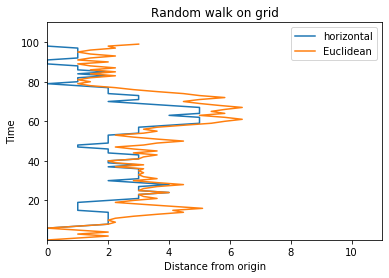

In [22]:
"""Simple random walk on a grid."""


# PARAMS
size = 11
steps = 100


g = nx.grid_graph([size, size])

origin = ((size - 1)/2, (size - 1)/2)
state = origin

path = []
h_distances = []
distances = []

for i in range(steps):
    
    x = state[0] - origin[0]
    y = state[1] - origin[1]
    
    path.append(state)
    h_distances.append([np.abs(x), i])
    distances.append([np.sqrt(np.square(x) + np.square(y)), i])
    
    state = rand.choice(list(g.neighbors(state)))


# horizontal distances from origin
x, y = zip(*h_distances)
plt.plot(x, y, label='horizontal')

# true distance from origin
x, y = zip(*distances)
plt.plot(x, y, label='Euclidean')

ax = plt.gca()
ax.spines['left'].set_position(('data',0))
plt.xlim([0, size])
plt.ylim([.1, steps * 1.1])
plt.legend(loc='upper right')
plt.xlabel("Distance from origin")
plt.ylabel("Time")
plt.title("Random walk on grid")

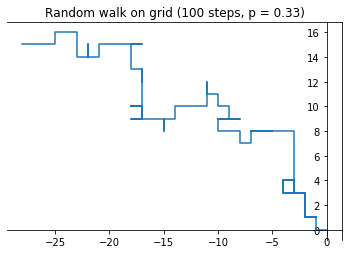

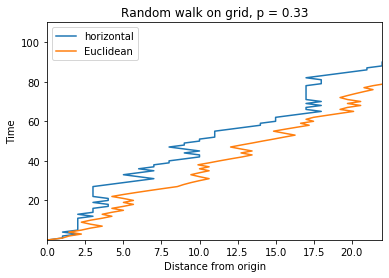

In [23]:
"""Biased random walk on a grid. 

Biased to prefer moving away from the origin,
with probabilities p for moving up/down and left/right,
depending on quadrant, and (1-p)/2 for each remaining move. 
"""


# PARAMS
size = 11
steps = 100
p = 1/3


g = nx.grid_graph([size, size])

origin = ((size - 1)/2, (size - 1)/2)
state = origin

path = []
h_distances = []
distances = []
    
def move(state, direction):
    new_state = state
    if (direction == "right"):
        new_state = (state[0]+1, state[1])
    elif (direction == "left"):
        new_state = (state[0]-1, state[1])
    elif (direction == "up"):
        new_state = (state[0], state[1]+1)
    elif (direction == "down"):
        new_state = (state[0], state[1]-1)
    return new_state

for i in range(steps):
    
    x = state[0] - origin[0]
    y = state[1] - origin[1]
    
    path.append((x, y))
    
    h_distances.append([np.abs(x), i])
    distances.append([np.sqrt(np.square(x) + np.square(y)), i])

    node_colors = {x:0 for x in g.nodes}
    edge_colors = {x:0 for x in g.edges}
    old_state = state

    alpha = rand.random()
    
    if (state == origin):
        state = rand.choice(list(g.neighbors(state)))
    if (x >= 0 and y > 0):
        if (alpha < p):
            state = move(state, "right")
        elif (alpha < 2*p):
            state = move(state, "up")
        elif (alpha < p+.5):
            state = move(state, "left")
        else:
            state = move(state, "down")
    elif (x < 0 and y >= 0 ):
        if (alpha < p):
            state = move(state, "left")
        elif (alpha < 2*p):
            state = move(state, "up")
        elif (alpha < p+.5):
            state = move(state, "right")
        else:
            state = move(state, "down")
    elif (x <= 0 and y < 0):
        if (alpha < p):
            state = move(state, "left")
        elif (alpha < 2*p):
            state = move(state, "down")
        elif (alpha < p+.5):
            state = move(state, "right")
        else:
            state = move(state, "up")
    elif (x > 0 and y <= 0):
        if (alpha < p):
            state = move(state, "right")
        elif (alpha < 2*p):
            state = move(state, "down")
        elif (alpha < p+.5):
            state = move(state, "left")
        else:
            state = move(state, "up")

            
    edge_colors[(old_state, state)]= 1
    edge_colors[(state, old_state)]= 1
    node_colors[old_state] = 2
    node_colors[state]=1
        
#     plt.figure()
#     nx.draw(g,pos = {x:x for x in g.nodes()}, node_color = [node_colors[x] for x in g.nodes()],
#         edge_color = [edge_colors[x] for x in g.edges()], width =3, cmap="jet")
#     plt.show()

x, y = zip(*path)
ax = plt.gca()
ax.spines['left'].set_position(('data',0))
ax.spines['bottom'].set_position(('data',0))
# plt.xlim([-size, size])
# plt.ylim([-size, size])
plt.title("Random walk on grid ({0} steps, p = {1:.2f})".format(steps, p))
plt.plot(x, y)
plt.show()

# horizontal distances from origin
x, y = zip(*h_distances)
plt.plot(x, y, label='horizontal')

# true distance from origin
x, y = zip(*distances)
plt.plot(x, y, label='Euclidean')

ax = plt.gca()
ax.spines['left'].set_position(('data',0))
plt.xlim([0, size * 2])
plt.ylim([.1, steps * 1.1])
plt.legend(loc='upper left')
plt.xlabel("Distance from origin")
plt.ylabel("Time")
plt.title("Random walk on grid, p = {0:.2f}".format(p))
plt.show()

### short burst on grid

In [7]:
def get_horizontal_distance(state_one, state_two):
    return np.abs(state_one[0] - state_two[0])

def get_euclidean_distance(state_one, state_two):
    return np.sqrt(np.square(state_one[0] - state_two[0]) + np.square(state_one[1] - state_two[1]))

Text(0.5, 1.0, 'Short bursts on grid')

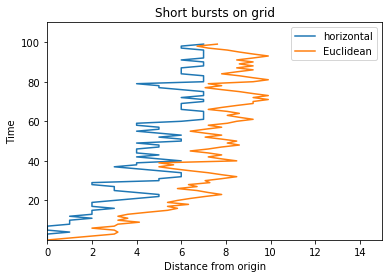

In [24]:
"""Short bursts on a grid."""


# PARAMS
size = 15
m = 10
num_bursts = 10
total_length = m * num_bursts
metric = get_horizontal_distance # or get_euclidan_distance


g = nx.grid_graph([size, size])

origin = ((size - 1)/2, (size - 1)/2)
state = origin

path = []
h_distances = []
distances = []

burst_max = state
t = 0
            
for j in range(num_bursts):
    
    state = burst_max
    
    for i in range(m):
        
        x = state[0] - origin[0]
        y = state[1] - origin[1]

        path.append((x,y))
        h_distances.append([np.abs(x), t])
        distances.append([np.sqrt(np.square(x) + np.square(y)), t])

        node_colors = {x:0 for x in g.nodes}
        edge_colors = {x:0 for x in g.edges}
        old_state = state

        state = rand.choice(list(g.neighbors(state)))
        edge_colors[(old_state, state)]= 1
        edge_colors[(state, old_state)]= 1
        node_colors[old_state] = 2
        node_colors[state]=1
        
        burst_max = state if metric(state, origin) > metric(burst_max, origin) else burst_max
        t+= 1
        
#     plt.figure()
#     nx.draw(g,pos = {x:x for x in g.nodes()}, node_color = [node_colors[x] for x in g.nodes()],
#         edge_color = [edge_colors[x] for x in g.edges()], width =3, cmap="jet")
#     plt.show()


# horizontal distances from origin
x, y = zip(*h_distances)
plt.plot(x, y, label='horizontal')

# true distance from origin
x, y = zip(*distances)
plt.plot(x, y, label='Euclidean')

ax = plt.gca()
ax.spines['left'].set_position(('data',0))
plt.xlim([0, size])
plt.ylim([.1, total_length * 1.1])
plt.legend(loc='upper right')
plt.xlabel("Distance from origin")
plt.ylabel("Time")
plt.title("Short bursts on grid")

In [25]:
def move(state, direction):
    new_state = state
    if (direction == "right"):
        new_state = (state[0]+1, state[1])
    elif (direction == "left"):
        new_state = (state[0]-1, state[1])
    elif (direction == "up"):
        new_state = (state[0], state[1]+1)
    elif (direction == "down"):
        new_state = (state[0], state[1]-1)
    return new_state

def grid_move(graph, state, origin, p, alpha):
    go = 0
    if (state == origin):
        return rand.choice(list(graph.neighbors(state)))
    if (x >= 0 and y > 0):
        if (alpha < p):
            go = "right"
        elif (alpha < 2*p):
            go = "up"
        elif (alpha < p + .5):
            go = "left"
        else:
            go = "down"
    elif (x < 0 and y >= 0 ):
        if (alpha < p):
            go = "left"
        elif (alpha < 2*p):
            go = "up"
        elif (alpha < p + .5):
            go = "right"
        else:
            go = "down"
    elif (x <= 0 and y < 0):
        if (alpha < p):
            go = "left"
        elif (alpha < 2*p):
            go = "down"
        elif (alpha < p + .5):
            go = "right"
        else:
            go = "up"
    elif (x > 0 and y <= 0):
        if (alpha < p):
            go = "right"
        elif (alpha < 2*p):
            go = "down"
        elif (alpha < p + .5):
            go = "left"
        else:
            go = "up"
    return move(state, go)

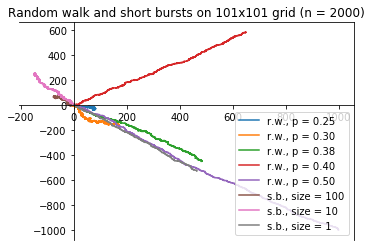

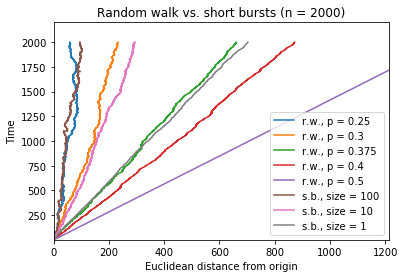

In [27]:
"""Compare random walks to short bursts on a grid."""


# PARAMS
size = 101
biases = [.25, .3, .375, .4, .5]
bursts_sizes = [100, 10, 1]
num_bursts = [20, 200, 2000] 
steps = 2000
total_length = 2000
#metric = get_horizontal_distance
#dist = "horizontal"
metric = get_euclidean_distance
dist = "Euclidean"
#

g = nx.grid_graph([size, size])

origin = ((size - 1)/2, (size - 1)/2)
state = origin

# random walk
rw_path = {"rw_path_{0}".format(b):[] for b in biases}
rw_h_distances = {"rw_h_distances_{0}".format(b):[] for b in biases}
rw_distances = {"rw_distances_{0}".format(b):[] for b in biases}

for bias in biases:
    
    p = bias
    state = origin
    
    for i in range(steps):

        x = state[0] - origin[0]
        y = state[1] - origin[1]

        rw_path["rw_path_{0}".format(p)].append((x, y))
        rw_h_distances["rw_h_distances_{0}".format(p)].append([np.abs(x), i])
        rw_distances["rw_distances_{0}".format(p)].append([np.sqrt(np.square(x) + np.square(y)), i])
        
        state = grid_move(g, state, origin, p, rand.random())


# short bursts
origin = ((size - 1)/2, (size - 1)/2)

bursts_path = {"bursts_path_{0}".format(b):[] for b in bursts_sizes}
bursts_h_distances = {"bursts_h_distances_{0}".format(b):[] for b in bursts_sizes}
bursts_distances = {"bursts_distances_{0}".format(b):[] for b in bursts_sizes}

for m in range(len(bursts_sizes)):

    t = 0
    state = origin
    burst_max = state

    for j in range(num_bursts[m]):

        state = burst_max

        for i in range(bursts_sizes[m]):

            x = state[0] - origin[0]
            y = state[1] - origin[1]

            bursts_path["bursts_path_{0}".format(bursts_sizes[m])].append((x, y))
            bursts_h_distances["bursts_h_distances_{0}".format(bursts_sizes[m])].append([np.abs(x), t])
            bursts_distances["bursts_distances_{0}".format(bursts_sizes[m])].append([np.sqrt(np.square(x) + np.square(y)), t])

            state = grid_move(g, state, origin, .25, rand.random())

            if (metric(state, origin) > metric(burst_max, origin)):
                burst_max = state 

            t+= 1
      
for b in biases:
    x, y = zip(*rw_path["rw_path_{0}".format(b)])
    plt.plot(x, y, label="r.w., p = {0:.2f}".format(b))

for b in bursts_sizes:
    x, y = zip(*bursts_path["bursts_path_{0}".format(b)])
    plt.plot(x, y, label="s.b., size = {0}".format(b))

ax = plt.gca()
ax.spines['left'].set_position(('data',0))
ax.spines['bottom'].set_position(('data',0))
# plt.xlim([-size, size])
# plt.ylim([-size, size])

plt.title("Random walk and short bursts on {0}x{0} grid (n = {1})".format(size, total_length))
plt.legend(loc='lower right')
#plt.savefig("grid_trajectories.png")
plt.show()


# # horizontal distances from origin
# for b in biases:
#     x, y = zip(*rw_h_distances["rw_h_distances_{0}".format(b)])
#     plt.plot(x, y, label='random walk, horizontal')

# true distance from origin
for b in biases:
    x, y = zip(*rw_distances["rw_distances_{0}".format(b)])
    plt.plot(x, y, label='r.w., p = {0}'.format(b))

# # horizontal distances from origin
# for b in bursts_sizes:
#     x, y = zip(*bursts_h_distances["bursts_h_distances".format(b)])
#     plt.plot(x, y, label='short bursts, horizontal')

# true distance from origin
for b in bursts_sizes:
    x, y = zip(*bursts_distances["bursts_distances_{0}".format(b)])
    plt.plot(x, y, label='s.b., size = {0}'.format(b))

ax = plt.gca()
ax.spines['left'].set_position(('data',0))
plt.xlim([0, size * 12])
plt.ylim([.1, steps * 1.1])
plt.legend(loc='lower right')
plt.xlabel("{0} distance from origin".format(dist))
plt.ylabel("Time")
plt.title("Random walk vs. short bursts (n = {0})".format(total_length))
#plt.savefig("grid_comparison.png")
plt.show()